In [1]:
#define the default font sizes to plot the figure
import matplotlib.pyplot as plt

plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [2]:
#Make this notebook's output stable across runs:
import numpy as np

np.random.seed(42)

In [3]:
## Common imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [4]:
# read the data
data = pd.read_csv('HousingPredict.csv', on_bad_lines='skip')

In [5]:
#show the top 5 rows, there are 13 attributes
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
# get a discription of the data, the total number of rows (entries) are 545, total 13 columns(attributes), each attribute's type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
#show a summary of the numerical attributes, only 6 columns showed
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


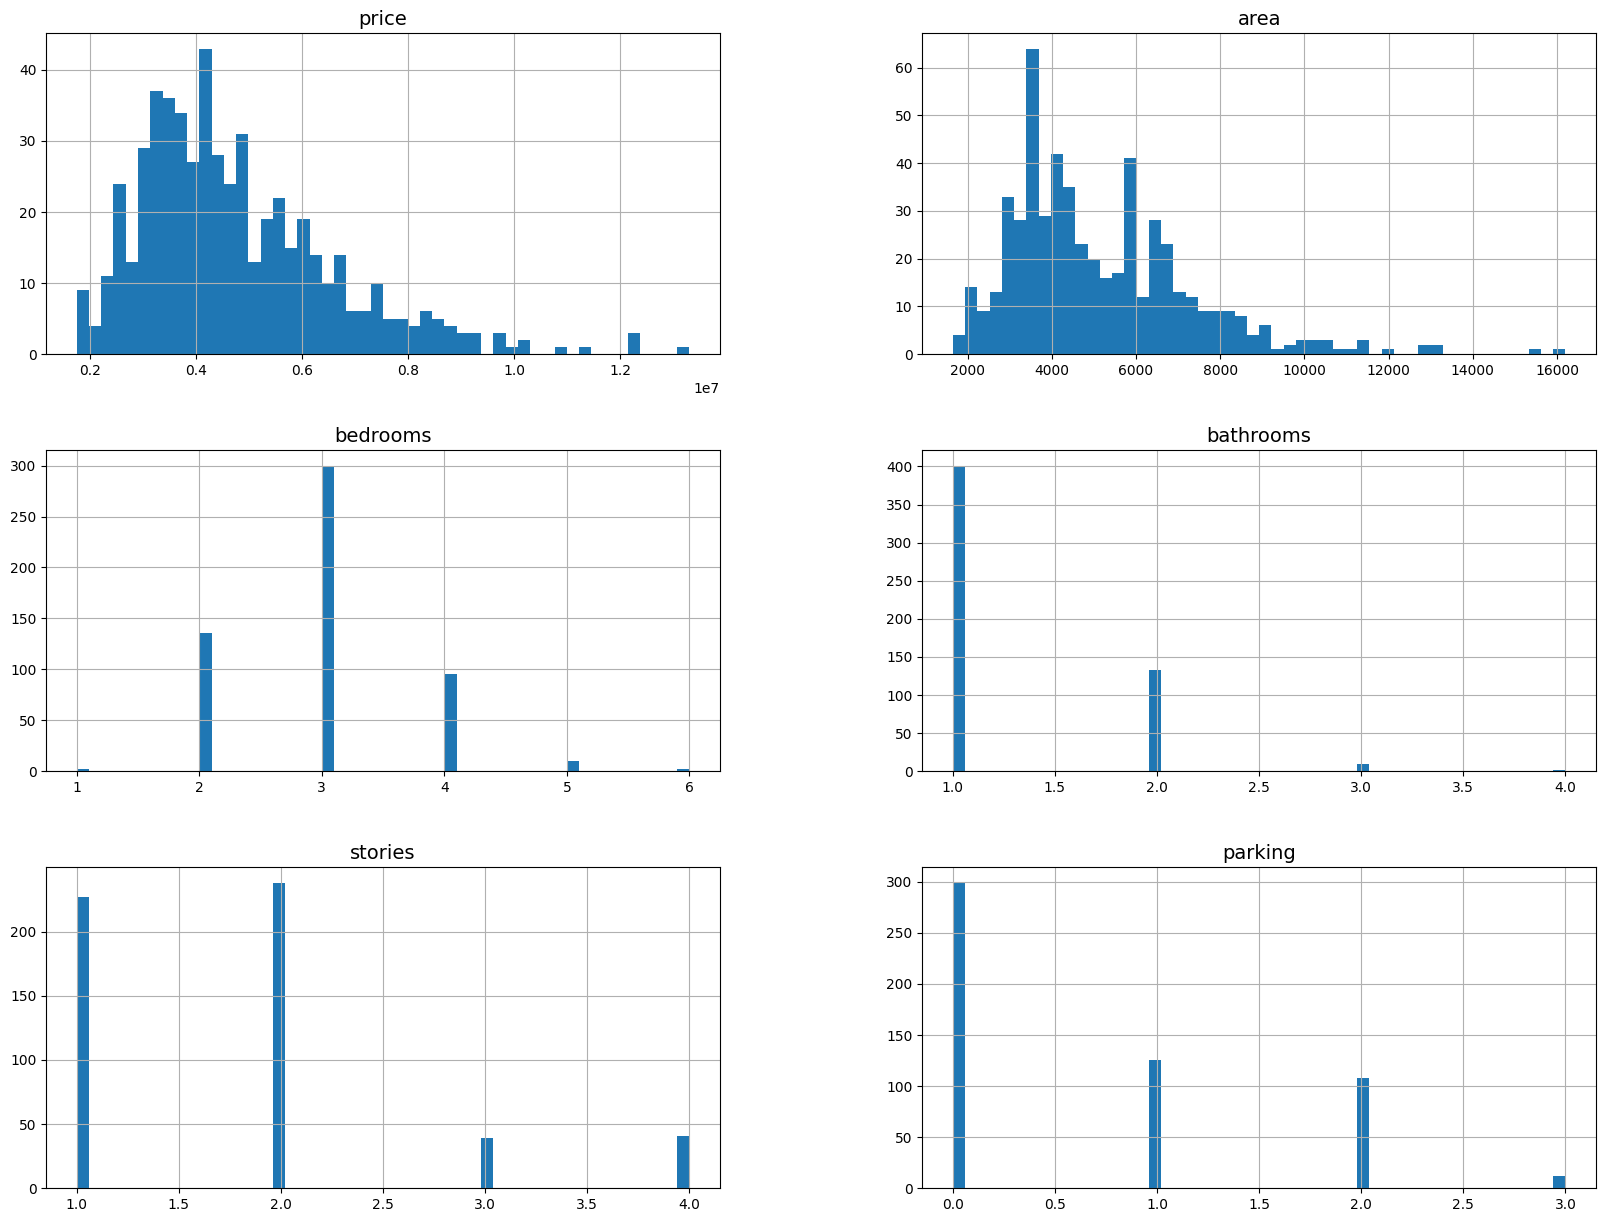

In [8]:
#plot a histogram for each numerical attribute  
%matplotlib inline 
import matplotlib.pyplot as plt
data.hist(bins=50,figsize=(20,15))
plt.show()

In [9]:
#Prepare the data for training a model
# transform the target value to normalize label, convert the attributes value from text to number
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [10]:
housing_cat_encoded = data
housing_cat_encoded.mainroad = label_encoder.fit_transform(housing_cat_encoded.mainroad)
housing_cat_encoded = data
housing_cat_encoded.guestroom =label_encoder.fit_transform(housing_cat_encoded.guestroom)
housing_cat_encoded = data
housing_cat_encoded.basement = label_encoder.fit_transform(housing_cat_encoded.basement)
housing_cat_encoded = data
housing_cat_encoded.airconditioning = label_encoder.fit_transform(housing_cat_encoded.airconditioning)
housing_cat_encoded = data
housing_cat_encoded.prefarea = label_encoder.fit_transform(housing_cat_encoded.prefarea)
housing_cat_encoded = data
housing_cat_encoded.furnishingstatus =label_encoder.fit_transform(housing_cat_encoded.furnishingstatus)
housing_cat_encoded.hotwaterheating = label_encoder.fit_transform(housing_cat_encoded.hotwaterheating)
housing_cat_encoded

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [11]:
#rerun the info and description to see transformed data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


In [12]:

data.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,1.069725
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


/Users/gong/my_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gong/my_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


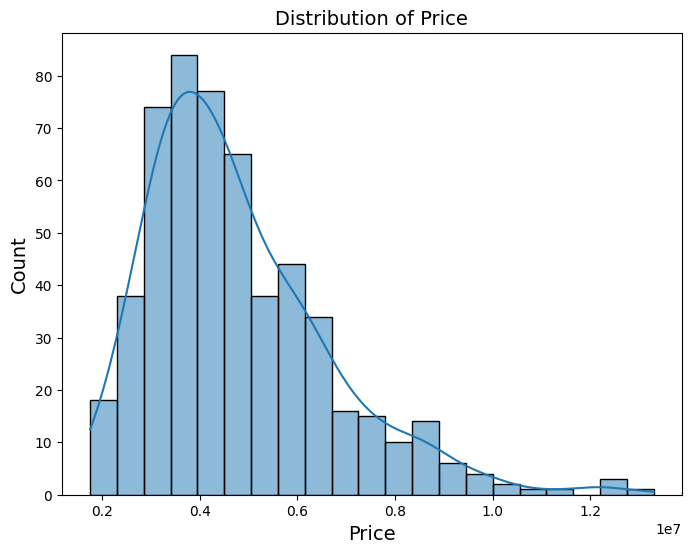

In [13]:
#plots price and count histogram to see the distribution of price
import seaborn as sns
plt.figure(figsize=(8,6))
sns.histplot(data['price'], kde =True)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Distribution of Price')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


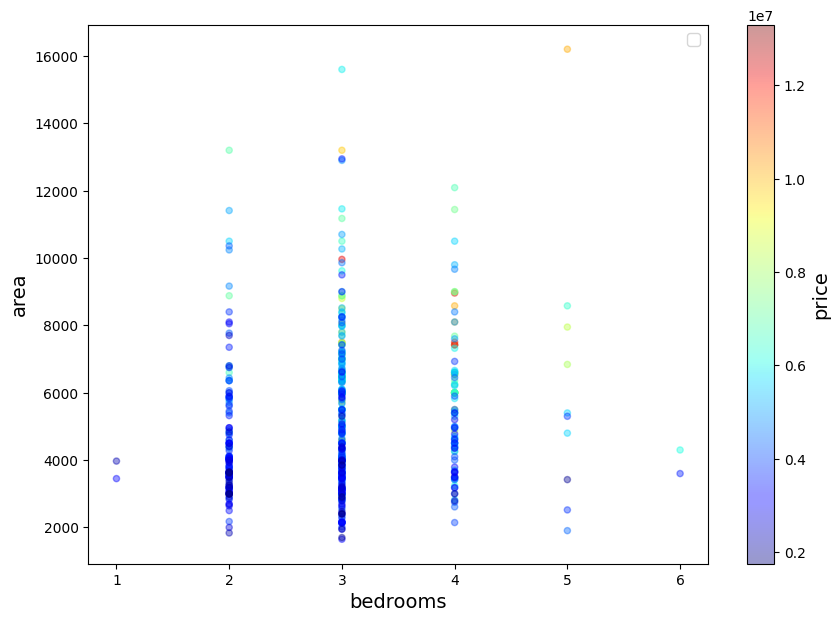

In [14]:
data.plot(kind='scatter',x='bedrooms', y='area',alpha=0.4,figsize=(10,7),c='price',cmap=plt.get_cmap('jet'),colorbar=True)
plt.legend()

In [15]:
X= data.drop('price',axis=1)
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,2
541,2400,3,1,1,0,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,0,2
543,2910,3,1,1,0,0,0,0,0,0,0,0


In [16]:
y=data['price']

In [17]:
#Create Test data set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25, random_state=42)


In [18]:
X_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
167,4600,2,2,1,1,0,0,0,1,2,0,1
368,5640,2,1,1,0,0,0,0,0,0,0,1
301,3520,3,1,2,1,0,0,0,0,0,1,1
527,1836,2,1,1,0,0,1,0,0,0,0,1
382,3150,3,1,2,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
71,6000,4,2,4,1,0,0,0,1,0,0,2
106,5450,4,2,1,1,0,1,0,1,0,1,1
270,4500,3,2,3,1,0,0,1,0,1,0,0
435,4040,2,1,1,1,0,0,0,0,0,0,2


In [19]:
X_test

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
316,5900,4,2,2,0,0,1,0,0,1,0,2
77,6500,3,2,3,1,0,0,0,1,0,1,0
360,4040,2,1,1,1,0,0,0,0,0,0,1
90,5000,3,1,2,1,0,0,0,1,0,0,1
493,3960,3,1,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
172,8400,3,1,2,1,1,1,0,1,2,1,2
124,6525,3,2,4,1,0,0,0,0,1,0,0
388,3650,3,1,2,1,0,0,0,0,0,0,2
521,3635,2,1,1,0,0,0,0,0,0,0,2


In [20]:
y_train

167    5285000
368    3675000
301    4200000
527    2275000
382    3570000
        ...   
71     6755000
106    6160000
270    4340000
435    3290000
102    6195000
Name: price, Length: 408, dtype: int64

In [21]:
y_test

316    4060000
77     6650000
360    3710000
90     6440000
493    2800000
        ...   
172    5250000
124    5950000
388    3500000
521    2408000
503    2660000
Name: price, Length: 137, dtype: int64

In [22]:
#Training and Evaluating on the Training set
#using DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor()
tree_reg.fit(X_train,y_train)

DecisionTreeRegressor()

In [23]:
from sklearn.metrics import mean_squared_error
housing_predictions =tree_reg.predict(X_train)
tree_mse=mean_squared_error(y_train,housing_predictions)
tree_rmse=np.sqrt(tree_mse)
tree_rmse

50263.13114939395

In [24]:
print('Decision Tree Score:', tree_reg.score(X_train,y_train))

Score: 0.9991893254888923


In [135]:
#Using Boosting (AdaBoostregressor) model 
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
X, y = make_regression(n_features = 13, n_informative = 2,random_state = 0, shuffle = False)
ADBregr = AdaBoostRegressor()
ADBregr.fit(X, y)

AdaBoostRegressor()

In [136]:
y_predict_b=ADBregr.predict(X)
y_predict_b.shape

(100,)

In [137]:
print('The score of Boosting is: ',ADBregr.score(X,y))

The score of Boosting is:  0.9591286344598458


In [25]:
#Using Support Vector Machines (SVMs) 
from sklearn.svm import SVC
svms = SVC()
svms.fit(X_train,y_train)

SVC()

In [26]:
y_predict = svms.predict(X_test)
y_predict.shape

(137,)

In [27]:
print('The score of Support Vector Machines is: ', svms.score(X_test,y_test)) 

The score of Support Vector Machines is:  0.014598540145985401


In [28]:
#accuracy score
from sklearn.metrics import accuracy_score
print('The accuracy score of Support Vector Machines is: ',accuracy_score(y_test,y_predict))

The accuracy score of Support Vector Machines is:  0.014598540145985401


In [29]:
#absolute error 
from sklearn.metrics import mean_absolute_error
print('The mean absolute error of Support Vector Machines is: ',mean_absolute_error(y_test,y_predict))

The mean absolute error of Support Vector Machines is:  1831958.7591240876


In [30]:
#Using K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors =5)
knc.fit(X_train,y_train)

KNeighborsClassifier()

In [31]:
y_predict = knc.predict(X_test)
y_predict.shape

(137,)

In [32]:
#score
print('The score of k-Nearest Neighbors is: ',knc.score(X_test,y_test))

The score of k-Nearest Neighbors is:  0.014598540145985401


In [33]:
#accuracy score
print('The accuracy score of k-Nearest Neighbors is: ',accuracy_score(y_test,y_predict))

The accuracy score of k-Nearest Neighbors is:  0.014598540145985401


In [34]:
#absolute error
print('The mean absolute error of k-Nearest Neighbors is: ', mean_absolute_error(y_test,y_predict))

The mean absolute error of k-Nearest Neighbors is:  1610385.7664233577


In [35]:
neighbors = np.arange(1,10)
train_score = {}
test_score = {}
for neighbor in neighbors :
    knc = KNeighborsClassifier(n_neighbors=neighbor)
    knc.fit(X_train,y_train)
    y_predict = knc.predict(X_test)
    train_score[neighbor] = knc.score(X_train,y_train)
    test_score[neighbor] =knc.score(X_test,y_test)

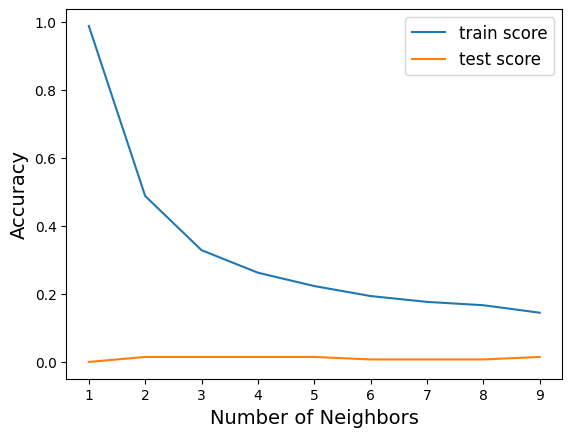

In [36]:
plt.plot(neighbors,train_score.values(),label='train score')
plt.plot(neighbors,test_score.values(),label='test score')
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

In [37]:
#Using Neural Networks
#Convert dataframe to an array
ds = data.values
ds

array([[13300000,     7420,        4, ...,        2,        1,        0],
       [12250000,     8960,        4, ...,        3,        0,        0],
       [12250000,     9960,        3, ...,        2,        1,        1],
       ...,
       [ 1750000,     3620,        2, ...,        0,        0,        2],
       [ 1750000,     2910,        3, ...,        0,        0,        0],
       [ 1750000,     3850,        3, ...,        0,        0,        2]])

In [95]:
#Split the dataset to input X_array and predict y_array
X_array= ds[:,1:13]

In [96]:
y_array= ds[:,0]

In [97]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X_scaler = min_max_scaler.fit_transform(X_array)

In [106]:
X_scaler

array([[0.39656357, 0.6       , 0.33333333, ..., 0.66666667, 1.        ,
        0.        ],
       [0.5024055 , 0.6       , 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.57113402, 0.4       , 0.33333333, ..., 0.66666667, 1.        ,
        0.5       ],
       ...,
       [0.13539519, 0.2       , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.08659794, 0.4       , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.15120275, 0.4       , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [118]:
y_array=y_array/10000000
y_array

array([1.33000e-06, 1.22500e-06, 1.22500e-06, 1.22150e-06, 1.14100e-06,
       1.08500e-06, 1.01500e-06, 1.01500e-06, 9.87000e-07, 9.80000e-07,
       9.80000e-07, 9.68100e-07, 9.31000e-07, 9.24000e-07, 9.24000e-07,
       9.10000e-07, 9.10000e-07, 8.96000e-07, 8.89000e-07, 8.85500e-07,
       8.75000e-07, 8.68000e-07, 8.64500e-07, 8.64500e-07, 8.57500e-07,
       8.54000e-07, 8.46300e-07, 8.40000e-07, 8.40000e-07, 8.40000e-07,
       8.40000e-07, 8.40000e-07, 8.29500e-07, 8.19000e-07, 8.12000e-07,
       8.08094e-07, 8.04300e-07, 7.98000e-07, 7.96250e-07, 7.91000e-07,
       7.87500e-07, 7.84000e-07, 7.70000e-07, 7.70000e-07, 7.56000e-07,
       7.56000e-07, 7.52500e-07, 7.49000e-07, 7.45500e-07, 7.42000e-07,
       7.42000e-07, 7.42000e-07, 7.35000e-07, 7.35000e-07, 7.35000e-07,
       7.35000e-07, 7.34300e-07, 7.24500e-07, 7.21000e-07, 7.21000e-07,
       7.14000e-07, 7.07000e-07, 7.07000e-07, 7.03500e-07, 7.00000e-07,
       6.93000e-07, 6.93000e-07, 6.89500e-07, 6.86000e-07, 6.790

In [120]:
#Prepare a training set and a test set by using sklearn train_test_split to split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaler,y_array, test_size = 0.3)

In [121]:
#prepare a validation set and a test set
X_val, X_val_test, y_val,y_val_test = train_test_split(X_test,y_test,test_size=0.5)

In [122]:
#show the shapes of the arrays
print('Training set: ', X_train.shape)
print('Validation set: ',X_val.shape)
print('Test set: ', X_test.shape)
print('Training predict: ', y_train.shape)
print('Validation predict: ',y_val.shape)
print('Test predict: ',y_test.shape)

Training set:  (381, 12)
Validation set:  (82, 12)
Test set:  (164, 12)
Training predict:  (381,)
Validation predict:  (82,)
Test predict:  (164,)


In [123]:
#Set up the Neural Network Architecture
import keras
from keras.models import Sequential
from keras.layers import Dense

In [124]:
#specify in Keras sequential model 
ann_model=Sequential([Dense(32,activation='relu',input_shape=(12,)),
                      Dense(32,activation='relu'),
                      Dense(1,activation='sigmoid'),])

In [125]:
#configuring the model, set the loss function for outputs in 1 or 0
ann_model.compile(optimizer='sgd',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [126]:
#Train the data, set up the parameters
hist = ann_model.fit(X_train,y_train,
                     batch_size=32,epochs=100,
                     validation_data=(X_val,y_val))

Epoch 1/100
12/12 [==============================] - 0s 5ms/step - loss: 0.6723 - accuracy: 0.0000e+00 - val_loss: 0.6245 - val_accuracy: 0.0000e+00
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 0.5747 - accuracy: 0.0000e+00 - val_loss: 0.5321 - val_accuracy: 0.0000e+00
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 0.4891 - accuracy: 0.0000e+00 - val_loss: 0.4512 - val_accuracy: 0.0000e+00
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 0.4142 - accuracy: 0.0000e+00 - val_loss: 0.3808 - val_accuracy: 0.0000e+00
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 0.3499 - accuracy: 0.0000e+00 - val_loss: 0.3209 - val_accuracy: 0.0000e+00
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 0.2959 - accuracy: 0.0000e+00 - val_loss: 0.2708 - val_accuracy: 0.0000e+00
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 0.2509 - accuracy: 0.0000e+00 - v

In [127]:
#Find the accuracy on the test set
ann_model.evaluate(X_test,y_test)[1]

6/6 [==============================] - 0s 1ms/step - loss: 0.0049 - accuracy: 0.0000e+00


0.0

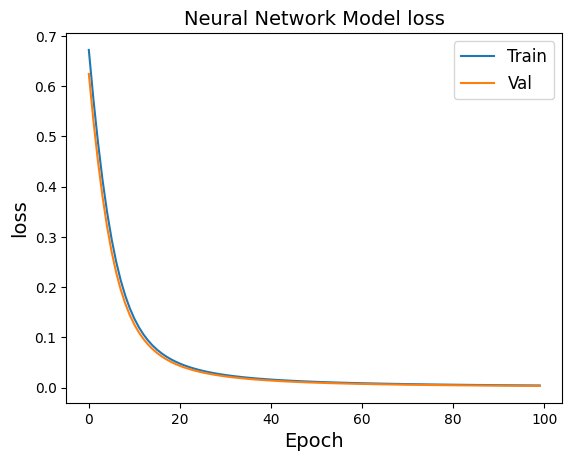

In [128]:
#Visulizing Loss and accuracy
#Visualize the training loss and the validation loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Neural Network Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='upper right')
plt.show()

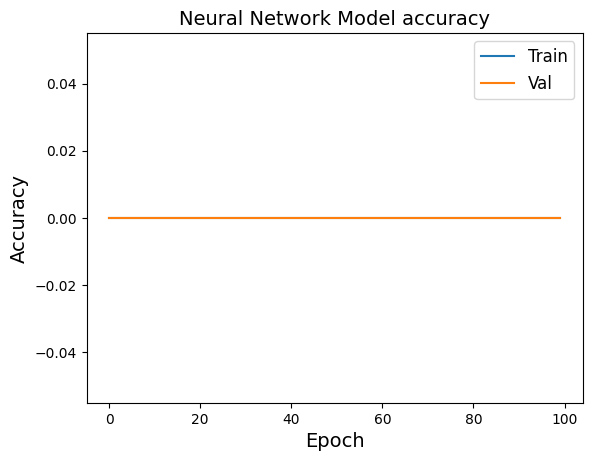

In [131]:
#plot the training accuracy and calidation accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Neural Network Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc ='upper right')
plt.show()